<a href="https://colab.research.google.com/github/AugustoVentura/PI_ML_OPS/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Importamos las librerias a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# Creamos el dataframe
df = pd.read_csv('datos_completos.csv')

<ipython-input-20-09489876ffdb>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos_completos.csv')


In [21]:
# Visualización de los datos
df.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,release_year,return
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"Animation,Comedy,Family",Pixar Animation Studios,United States of America,English,1995.0,12.451801
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"Adventure,Fantasy,Family","TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,"English,Français",1995.0,4.043035
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"Romance,Comedy","Warner Bros.,Lancaster Gate",United States of America,English,1995.0,0.000000
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,"Comedy,Drama,Romance",Twentieth Century Fox Film Corporation,United States of America,English,1995.0,5.090760
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-10-02,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,Comedy,"Sandollar Productions,Touchstone Pictures",United States of America,English,1995.0,0.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 45376 non-null  float64
 1   id                     45379 non-null  object 
 2   original_language      45368 non-null  object 
 3   overview               44438 non-null  object 
 4   popularity             45377 non-null  object 
 5   release_date           45376 non-null  object 
 6   revenue                45379 non-null  float64
 7   runtime                45130 non-null  float64
 8   status                 45296 non-null  object 
 9   tagline                20398 non-null  object 
 10  title                  45376 non-null  object 
 11  vote_average           45376 non-null  float64
 12  vote_count             45376 non-null  float64
 13  belongs_to_collection  4488 non-null   object 
 14  genres                 42995 non-null  object 
 15  pr

In [23]:
df.shape

(45379, 20)

In [24]:
# Estadistica descriptiva
df.describe(include='all')

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,release_year,return
count,4.537600e+04,45379,45368,44438,45377,45376,4.537900e+04,45130.000000,45296,20398,45376,45376.000000,45376.000000,4488,42995,33580,39165,41485,45376.000000,4.537900e+04
unique,NaN,45349,92,44233,44142,17169,NaN,NaN,6,20269,42194,NaN,NaN,1695,4067,22667,2388,1841,NaN,NaN
top,NaN,141971,en,No overview found.,1.00E-06,2008-01-01,NaN,NaN,Released,Based on a true story.,Cinderella,NaN,NaN,The Bowery Boys,Drama,Metro-Goldwyn-Mayer (MGM),United States of America,English,NaN,NaN
freq,NaN,3,32202,133,30,138,NaN,NaN,44936,7,11,NaN,NaN,29,4998,742,17846,22380,NaN,NaN
mean,4.232604e+06,NaN,NaN,NaN,NaN,NaN,1.122936e+07,94.181675,NaN,NaN,NaN,5.624070,110.096439,NaN,NaN,NaN,NaN,NaN,2012.416277,6.599991e+02
std,1.743986e+07,NaN,NaN,NaN,NaN,NaN,6.438789e+07,38.341059,NaN,NaN,NaN,1.915423,491.742894,NaN,NaN,NaN,NaN,NaN,24.365504,7.469083e+04
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1874.000000,0.000000e+00
25%,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,85.000000,NaN,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,NaN,NaN,1999.000000,0.000000e+00
50%,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,6.000000,10.000000,NaN,NaN,NaN,NaN,NaN,2009.000000,0.000000e+00
75%,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,107.000000,NaN,NaN,NaN,6.800000,34.000000,NaN,NaN,NaN,NaN,NaN,2015.000000,0.000000e+00


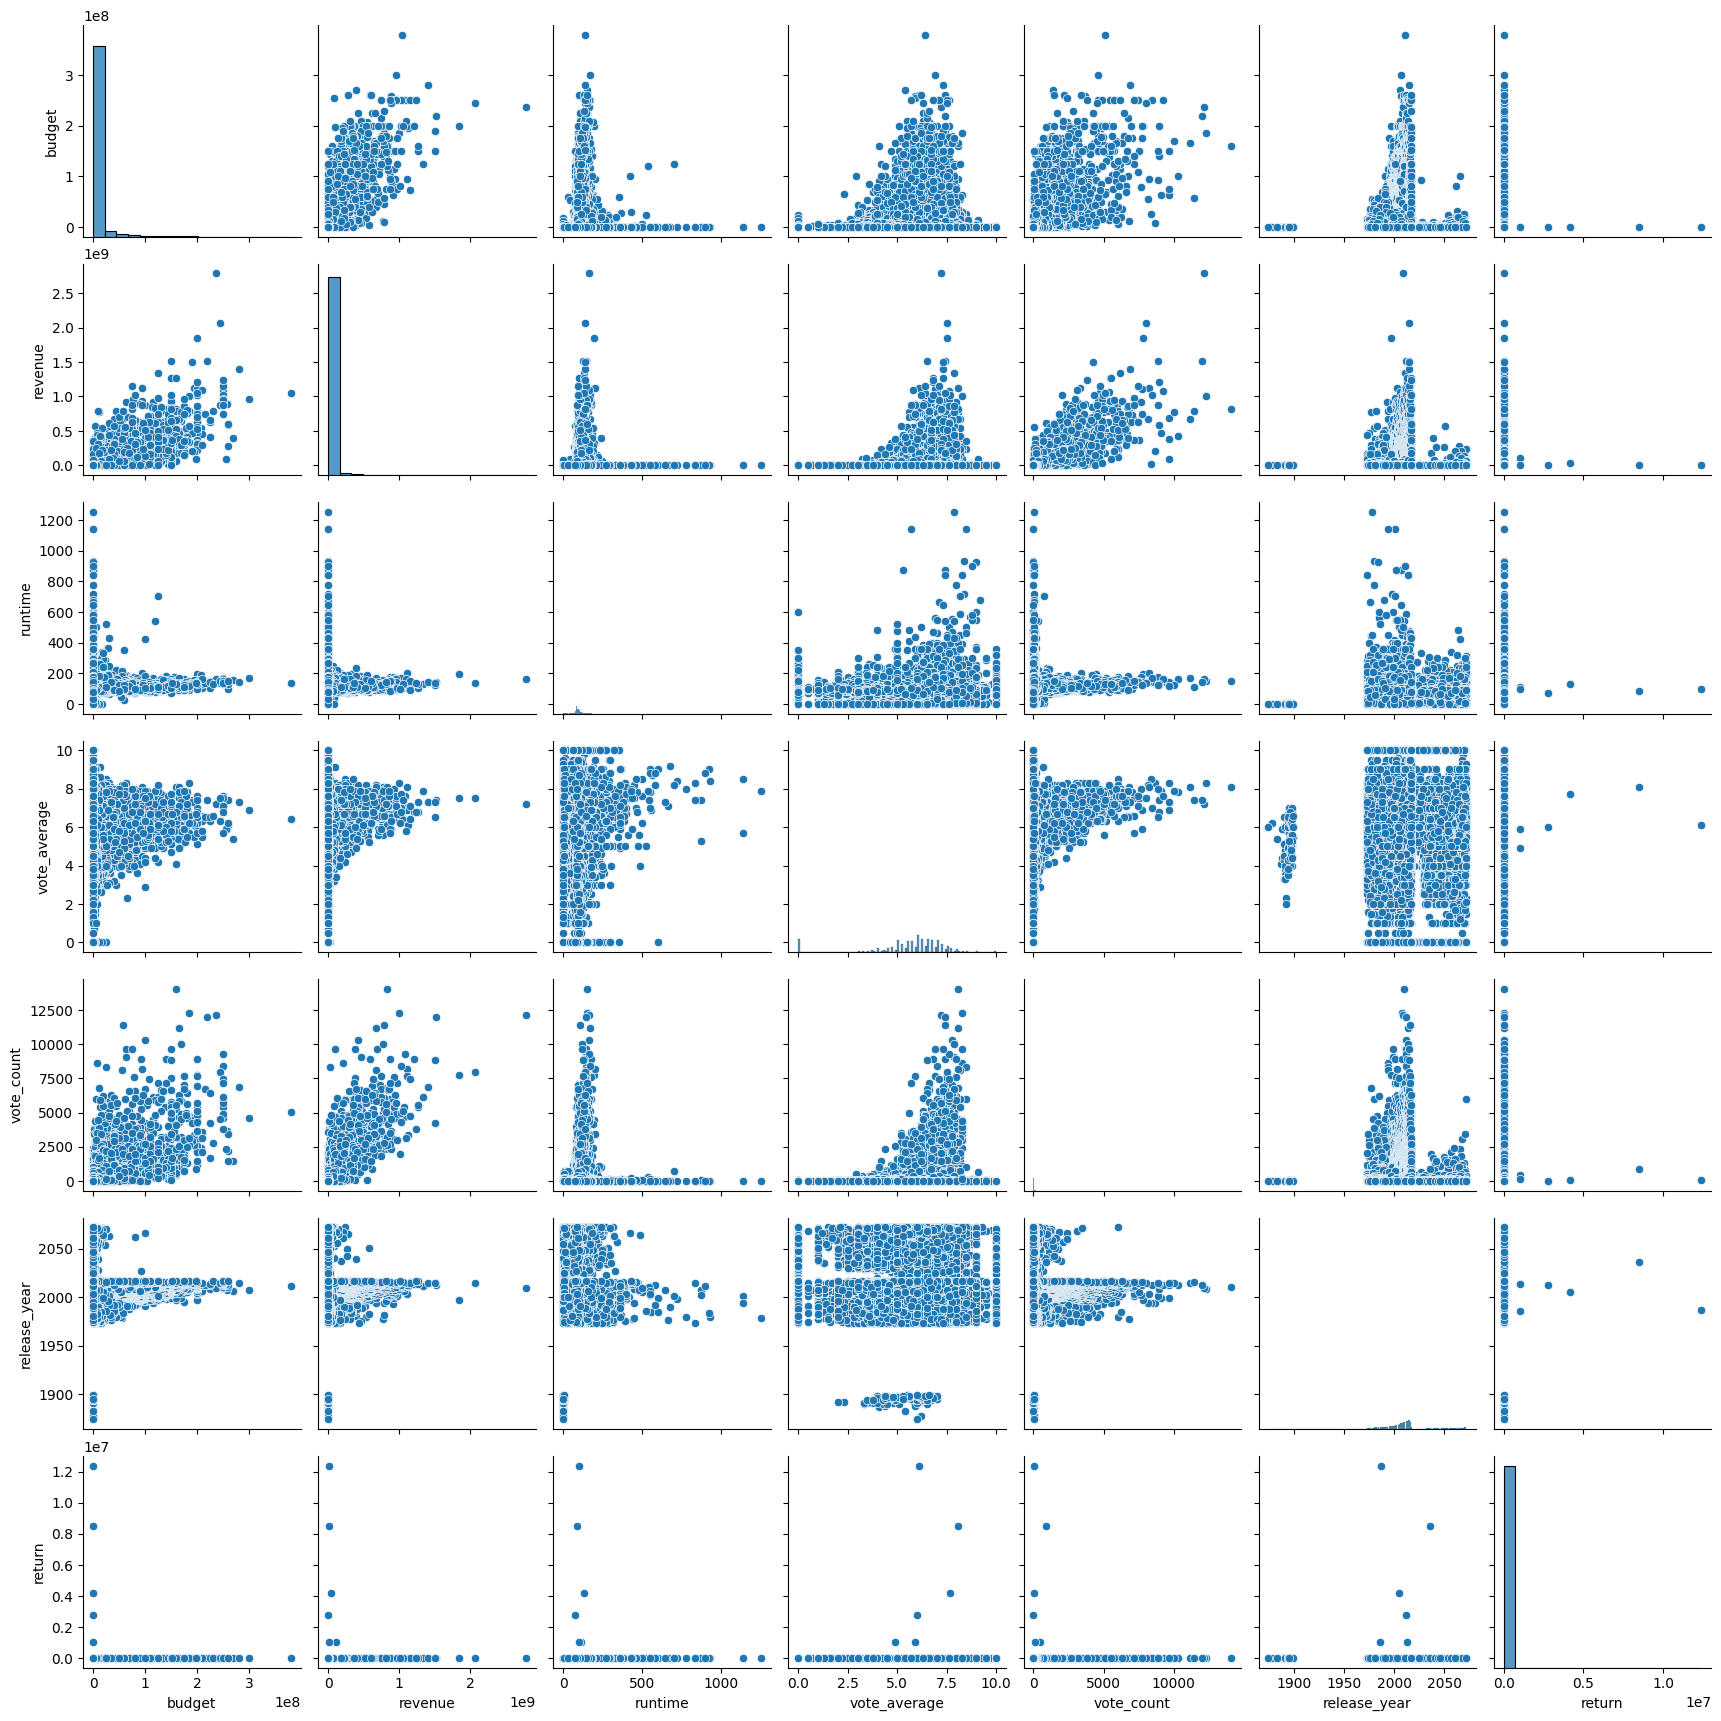

In [25]:
# Se realiza un histograma junto con el gráfico de dispersión, para confirmar que los datos se encuentran dispersos, como ya se esperaba por la desviación estandar tan elevada
sns.pairplot(data=df)

# Nubes de palabras

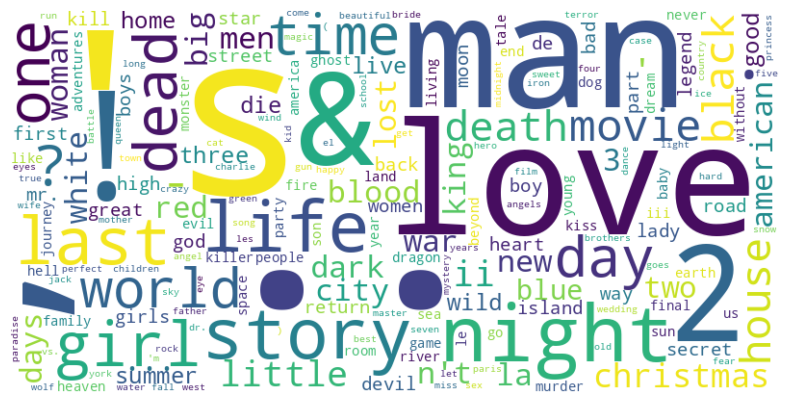

In [33]:
# Las palabras más usadas en los titulos
def generar_wordcloud(textos):
    # Se obtienen las preposisciones en ingles
    stop_words = set(stopwords.words('english'))

    # Se unifica el string
    texto_combinado = ' '.join(map(str, textos))

    # Se tokenizan las palabras
    tokenizacion = word_tokenize(texto_combinado)

    # Se hacen en minusculas
    filtered_words = [word.lower() for word in tokenizacion if word.lower() not in stop_words]

    # Se crea la distribución de frecuencia
    dist_frec = nltk.FreqDist(filtered_words)
    # Se crea la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dist_frec)

    # Visualización de la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Se combina el texto de toda la columna
all_text = df['title'].tolist()

# Se aplica la función al texto
generar_wordcloud(all_text)

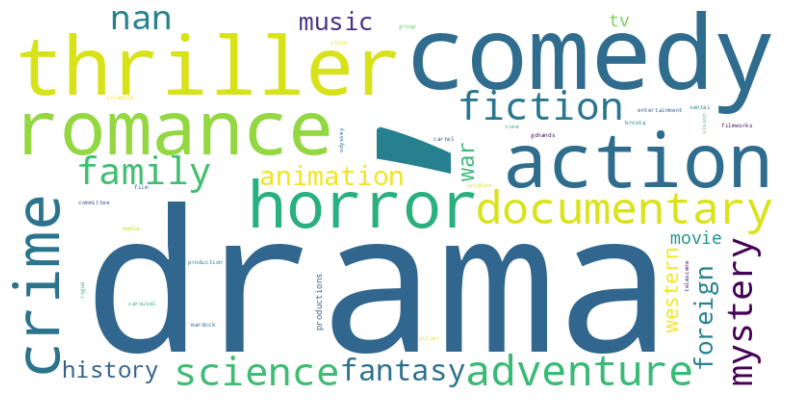

In [35]:
# Las palabras más usadas en los generos
def generar_wordcloud(textos):
    # Se obtienen las preposisciones en ingles
    stop_words = set(stopwords.words('english'))

    # Se unifica el string
    texto_combinado = ' '.join(map(str, textos))

    # Se tokenizan las palabras
    tokenizacion = word_tokenize(texto_combinado)

    # Se hacen en minusculas
    filtered_words = [word.lower() for word in tokenizacion if word.lower() not in stop_words]

    # Se crea la distribución de frecuencia
    dist_frec = nltk.FreqDist(filtered_words)
    # Se crea la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dist_frec)

    # Visualización de la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Se combina el texto de toda la columna
all_text = df['genres'].tolist()

# Se aplica la función al texto
generar_wordcloud(all_text)

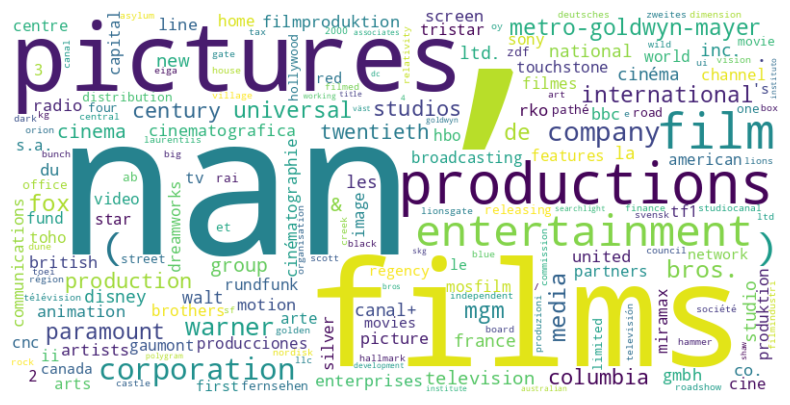

In [36]:
# Las palabras más usadas en las productoras
def generar_wordcloud(textos):
    # Se obtienen las preposisciones en ingles
    stop_words = set(stopwords.words('english'))

    # Se unifica el string
    texto_combinado = ' '.join(map(str, textos))

    # Se tokenizan las palabras
    tokenizacion = word_tokenize(texto_combinado)

    # Se hacen en minusculas
    filtered_words = [word.lower() for word in tokenizacion if word.lower() not in stop_words]

    # Se crea la distribución de frecuencia
    dist_frec = nltk.FreqDist(filtered_words)
    # Se crea la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dist_frec)

    # Visualización de la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Se combina el texto de toda la columna
all_text = df['production_companies'].tolist()

# Se aplica la función al texto
generar_wordcloud(all_text)

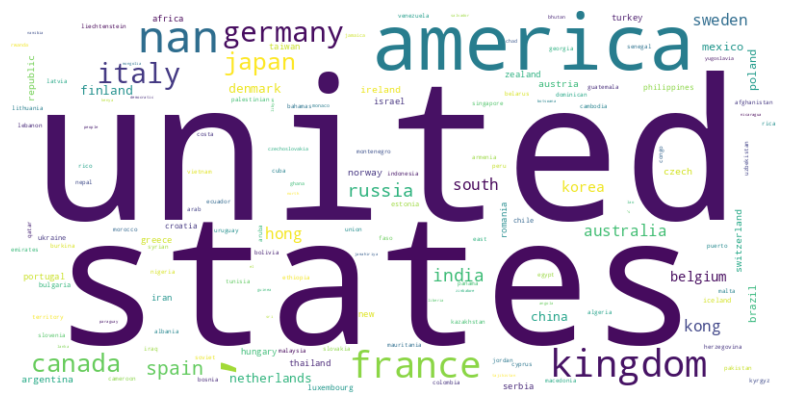

In [37]:
# Las palabras más usadas en donde se han hecho más peliculas
def generar_wordcloud(textos):
    # Se obtienen las preposisciones en ingles
    stop_words = set(stopwords.words('english'))

    # Se unifica el string
    texto_combinado = ' '.join(map(str, textos))

    # Se tokenizan las palabras
    tokenizacion = word_tokenize(texto_combinado)

    # Se hacen en minusculas
    filtered_words = [word.lower() for word in tokenizacion if word.lower() not in stop_words]

    # Se crea la distribución de frecuencia
    dist_frec = nltk.FreqDist(filtered_words)
    # Se crea la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dist_frec)

    # Visualización de la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Se combina el texto de toda la columna
all_text = df['production_countries'].tolist()

# Se aplica la función al texto
generar_wordcloud(all_text)

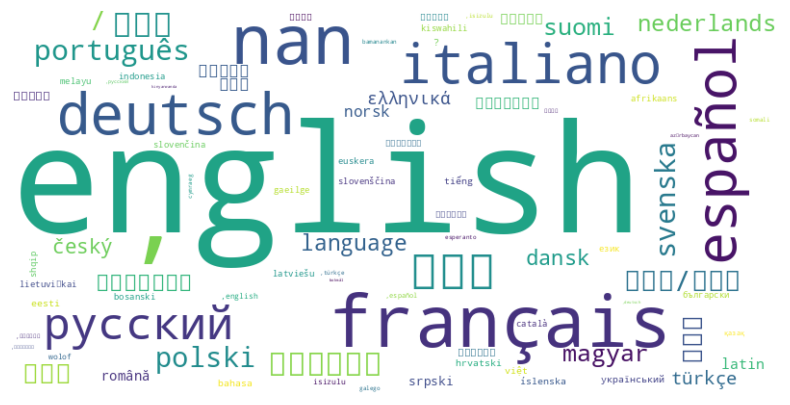

In [38]:
# Las palabras más usadas en los idiomas que se hacen en las peliculas
def generar_wordcloud(textos):
    # Se obtienen las preposisciones en ingles
    stop_words = set(stopwords.words('english'))

    # Se unifica el string
    texto_combinado = ' '.join(map(str, textos))

    # Se tokenizan las palabras
    tokenizacion = word_tokenize(texto_combinado)

    # Se hacen en minusculas
    filtered_words = [word.lower() for word in tokenizacion if word.lower() not in stop_words]

    # Se crea la distribución de frecuencia
    dist_frec = nltk.FreqDist(filtered_words)
    # Se crea la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dist_frec)

    # Visualización de la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Se combina el texto de toda la columna
all_text = df['spoken_languages'].tolist()

# Se aplica la función al texto
generar_wordcloud(all_text)